In [2]:
import math

class FreeElectronScattering:
    def __init__(self, incident_photon_energy):
        self.incident_photon_energy = incident_photon_energy

    def compute_cross_section(self):
        electron_rest_mass = 0.51099895  # MeV/c^2
        electron_mass_energy = electron_rest_mass * math.pow(10, 6)  # eV
        electron_compton_wavelength = 2.42631023867 * math.pow(10, -12)  # cm

        h = 4.135667696 * math.pow(10, -15)  # eV s
        c = 2.99792458 * math.pow(10, 10)  # cm/s

        incident_energy = self.incident_photon_energy * math.pow(10, 6)  # eV

        scattering_angle = math.pi  # Scattering angle of 180 degrees

        term1 = math.pow((1 + (incident_energy / electron_mass_energy) * (1 - math.cos(scattering_angle))), -2)
        term2 = 1 + math.cos(scattering_angle) * math.cos(scattering_angle)
        term3 = incident_energy * incident_energy * (1 - math.cos(scattering_angle)) / (electron_mass_energy * electron_mass_energy)

        cross_section = math.pi * electron_compton_wavelength * electron_compton_wavelength * term1 * (term2 + term3)

        return cross_section

# Example usage
incident_photon_energy = 1  # MeV
scattering = FreeElectronScattering(incident_photon_energy)
cross_section = scattering.compute_cross_section()
print(f"Scattering Cross-Section: {cross_section} cm^2")

Scattering Cross-Section: 7.398366744202651e-24 cm^2


In [4]:
class FreeElectronScattering:
    def __init__(self, incident_energy):
        self.incident_energy = incident_energy
        self.electron_mass = 9.10938356e-31  # kg
        self.speed_of_light = 299792458  # m/s
        self.planck_constant = 6.62607015e-34  # J·s
        self.avogadro_number = 6.02214076e23  # mol^-1

    def compute_cross_section(self):
        import math

        def klein_nishina_formula(incident_energy, scattering_angle):
            electron_rest_energy = self.electron_mass * self.speed_of_light ** 2
            wavelength = self.planck_constant / (incident_energy * 1.60218e-19)
            reduced_wavelength = wavelength / (2 * math.pi)
            scattering_energy = incident_energy / (1 + (incident_energy / electron_rest_energy) * (1 - math.cos(scattering_angle)))
            scattering_wavelength = self.planck_constant / (scattering_energy * 1.60218e-19)
            reduced_scattering_wavelength = scattering_wavelength / (2 * math.pi)
            cross_section = (2 * math.pi * self.avogadro_number * self.electron_mass * self.speed_of_light ** 2 * (1 - math.cos(scattering_angle))) / \
                            (incident_energy * 1.60218e-19 * (reduced_wavelength ** 2) * (reduced_scattering_wavelength ** 2))
            return cross_section

        incident_energy_keV = self.incident_energy * 1e-3  # Convert to keV
        scattering_cross_sections = []
        for energy in range(1, int(incident_energy_keV * 1e6) + 1, 1):
            incident_energy = energy * 1e-6  # Convert back to MeV
            scattering_angle = math.pi  # Scattering angle of 180 degrees
            cross_section = klein_nishina_formula(incident_energy, scattering_angle)
            scattering_cross_sections.append(cross_section)

        return scattering_cross_sections


# Example usage
scattering = FreeElectronScattering(1)
cross_sections = scattering.compute_cross_section()
print(cross_sections)

[3.4524007147140696e+58, 6.904801712079835e+58, 1.0357202709445595e+59, 1.380960370681137e+59, 1.7262004704177133e+59, 2.0714405701542895e+59, 2.416680669890867e+59, 2.761920769627444e+59, 3.1071608693640206e+59, 3.4524009691005975e+59, 3.7976410688371735e+59, 4.142881168573752e+59, 4.488121268310329e+59, 4.833361368046906e+59, 5.178601467783482e+59, 5.523841567520061e+59, 5.869081667256637e+59, 6.214321766993214e+59, 6.559561866729788e+59, 6.904801966466367e+59, 7.250042066202943e+59, 7.5952821659395175e+59, 7.9405222656760975e+59, 8.285762365412677e+59, 8.631002465149252e+59, 8.976242564885828e+59, 9.321482664622403e+59, 9.666722764358984e+59, 1.0011962864095561e+60, 1.0357202963832135e+60, 1.0702443063568714e+60, 1.1047683163305293e+60, 1.1392923263041864e+60, 1.1738163362778441e+60, 1.2083403462515022e+60, 1.2428643562251596e+60, 1.2773883661988173e+60, 1.311912376172475e+60, 1.3464363861461331e+60, 1.3809603961197903e+60, 1.415484406093448e+60, 1.450008416067106e+60, 1.48453242604

In [5]:
import math

def calculate_differential_cross_section(incident_energy, scattering_angle):
    incident_energy = incident_energy / 1e6  # Convert incident energy from eV to MeV
    scattering_angle = math.radians(scattering_angle)  # Convert scattering angle from degrees to radians

    electron_mass = 0.511  # MeV/c^2
    electron_radius = 2.81794e-13  # cm

    # Compton wavelength
    compton_wavelength = 2 * math.pi * electron_radius / (electron_mass * math.pow(1 + incident_energy / electron_mass, 2))

    # Calculate the differential cross-section using the Klein-Nishina formula
    differential_cross_section = (electron_radius ** 2) * ((1 + math.cos(scattering_angle) ** 2) /
                                                           (2 * (1 + incident_energy / electron_mass) ** 2)) * \
                                (1 + (incident_energy / electron_mass) ** 2 * (1 - math.cos(scattering_angle)) ** 2 /
                                     (1 + math.cos(scattering_angle)) ** 2 + (incident_energy / electron_mass) ** 2)

    return differential_cross_section

# Example usage
incident_energy = 1e6  # 1 MeV
scattering_angle = 30  # degrees

differential_cross_section = calculate_differential_cross_section(incident_energy, scattering_angle)
print(f"Differential cross-section: {differential_cross_section} cm^2/sr")

Differential cross-section: 3.85363792047281e-26 cm^2/sr


In [6]:
import math

class FreeElectronDifferentialScattering:
    def __init__(self, incident_photon_energy, scattering_angle):
        self.incident_photon_energy = incident_photon_energy
        self.scattering_angle = scattering_angle

    def compute_differential_cross_section(self):
        incident_photon_energy = self.incident_photon_energy
        scattering_angle = math.radians(self.scattering_angle)

        electron_mass = 9.10938356e-31  # kg
        speed_of_light = 299792458  # m/s
        planck_constant = 6.62607015e-34  # J·s
        elementary_charge = 1.602176634e-19  # C

        photon_energy = incident_photon_energy * elementary_charge  # J

        electron_rest_energy = electron_mass * speed_of_light ** 2  # J

        gamma = photon_energy / electron_rest_energy + 1
        beta = math.sqrt(1 - 1 / gamma ** 2)

        momentum = math.sqrt(photon_energy ** 2 - electron_rest_energy ** 2) / speed_of_light  # kg·m/s

        scattering_cross_section = (math.pi * electron_rest_energy ** 2 * math.sin(scattering_angle) ** 2) / (
                2 * momentum ** 2 * gamma ** 2 * beta ** 2)  # m^2

        differential_cross_section = scattering_cross_section * (1 + math.cos(scattering_angle) ** 2)  # m^2

        differential_cross_section_cm2_sr = differential_cross_section * 1e4  # cm^2/sr

        return differential_cross_section_cm2_sr

# Example usage
incident_photon_energy = 1e6  # 1 MeV
scattering_angle = 30  # degrees

scattering = FreeElectronDifferentialScattering(incident_photon_energy, scattering_angle)
differential_cross_section = scattering.compute_differential_cross_section()

print(f"Differential Cross-section: {differential_cross_section} cm^2/sr")

Differential Cross-section: 2.818802762657782e+19 cm^2/sr


In [7]:
import math

class FreeElectronDifferentialScattering:
    def __init__(self, incident_energy):
        self.incident_energy = incident_energy

    def compute_differential_cross_section(self, scattering_angle):
        scattering_angle_rad = math.radians(scattering_angle)
        incident_energy = self.incident_energy
        electron_mass = 9.10938356e-31  # kg
        speed_of_light = 299792458  # m/s
        planck_constant = 6.62607015e-34  # J*s
        electron_charge = 1.602176634e-19  # C

        # Calculate the Compton wavelength
        compton_wavelength = (planck_constant / (electron_mass * speed_of_light))

        # Calculate the wavelength of the incident photon
        incident_wavelength = (compton_wavelength / (1 + (incident_energy / (electron_mass * speed_of_light**2))))

        # Calculate the wavelength of the scattered photon
        scattered_wavelength = (incident_wavelength + (compton_wavelength * (1 - math.cos(scattering_angle_rad))))

        # Calculate the differential cross-section using the Klein-Nishina formula
        differential_cross_section = ((electron_charge**2) / (4 * math.pi * (scattered_wavelength**2))) * \
                                     (((incident_wavelength / scattered_wavelength) +
                                       (scattered_wavelength / incident_wavelength) -
                                       (math.sin(scattering_angle_rad)**2)) /
                                      (1 + (incident_wavelength / scattered_wavelength) *
                                       (1 - math.cos(scattering_angle_rad))))

        return differential_cross_section

# Compute the differential scattering cross-section for a range of incident photon energies and scattering angles
results = {}
for energy in range(1000, 10000001, 1000):  # Energy range: 1 keV to 10 MeV with a step size of 1 keV
    cross_sections = []
    for angle in range(0, 181, 30):  # Scattering angle range: 0 degrees to 180 degrees with a step size of 30 degrees
        scattering = FreeElectronDifferentialScattering(energy)
        cross_section = scattering.compute_differential_cross_section(angle)
        cross_sections.append(cross_section)
    results[energy] = cross_sections

# Access and analyze the computed cross-section values
for energy, cross_sections in results.items():
    print(f"Incident Photon Energy: {energy} eV")
    for angle, cross_section in zip(range(0, 181, 30), cross_sections):
        print(f"Scattering Angle: {angle} degrees, Cross-Section: {cross_section} cm^2")
    print()

Incident Photon Energy: 1000 eV
Scattering Angle: 0 degrees, Cross-Section: 1.0353506354647334e+17 cm^2
Scattering Angle: 30 degrees, Cross-Section: 31.634822109646716 cm^2
Scattering Angle: 60 degrees, Cross-Section: 8.476525036982064 cm^2
Scattering Angle: 90 degrees, Cross-Section: 4.238262518491033 cm^2
Scattering Angle: 120 degrees, Cross-Section: 2.825508345660689 cm^2
Scattering Angle: 150 degrees, Cross-Section: 2.2712780382815367 cm^2
Scattering Angle: 180 degrees, Cross-Section: 2.119131259245516 cm^2

Incident Photon Energy: 2000 eV
Scattering Angle: 0 degrees, Cross-Section: 4.141402541858934e+17 cm^2
Scattering Angle: 30 degrees, Cross-Section: 63.269644219293454 cm^2
Scattering Angle: 60 degrees, Cross-Section: 16.953050073964135 cm^2
Scattering Angle: 90 degrees, Cross-Section: 8.476525036982068 cm^2
Scattering Angle: 120 degrees, Cross-Section: 5.651016691321378 cm^2
Scattering Angle: 150 degrees, Cross-Section: 4.5425560765630735 cm^2
Scattering Angle: 180 degrees, Cro

In [18]:
import math

def calculate_differential_cross_section(incident_energy, scattering_angle):
    # Convert incident energy from eV to MeV
    incident_energy_mev = incident_energy / 1e6
    # Convert scattering angle from degrees to radians
    scattering_angle_rad = math.radians(scattering_angle)
    
    # Constants
    electron_mass = 9.10938356e-31  # kg
    speed_of_light = 299792458  # m/s
    planck_constant = 6.62607015e-34  # J*s
    electron_charge = 1.602176634e-19  # C
    
    # Compton wavelength
    compton_wavelength = (planck_constant / (electron_mass * speed_of_light))
    
    # Calculate the differential scattering cross-section using Klein-Nishina formula
    term1 = (electron_charge ** 2) / (2 * electron_mass * (speed_of_light ** 2))
    term2 = (1 + math.cos(scattering_angle_rad)) ** 2
    term3 = (1 + (incident_energy_mev / (electron_mass * (speed_of_light ** 2))) * (1 - math.cos(scattering_angle_rad)))
    term4 = (1 + (incident_energy_mev / (electron_mass * (speed_of_light ** 2)))) ** 2
    differential_cross_section = term1 * term2 * (term3 / term4)
    
    return differential_cross_section

# Example usage
incident_energy = 1e6  # 1 MeV
scattering_angle = 30  # degrees

differential_cross_section = calculate_differential_cross_section(incident_energy, scattering_angle)
print(f"Differential scattering cross-section: {differential_cross_section} cm^2/sr")

Differential scattering cross-section: 5.987538960386504e-39 cm^2/sr


In [20]:
import numpy as np

class FreeElectronTotalScattering:
    def __init__(self, incident_energy):
        self.incident_energy = incident_energy

    def compute_total_cross_section(self):
        # Constants
        h = 4.135667696e-15  # Planck's constant (eV s)
        c = 2.99792458e8  # Speed of light (m/s)
        re = 2.8179403227e-15  # Classical electron radius (m)

        # Convert incident energy to Joules
        incident_energy_joules = self.incident_energy * 1e-6

        # Compute wavelength of incident photon
        wavelength = h * c / incident_energy_joules

        # Compute total cross-section
        total_cross_section = 2 * np.pi * re**2 * (1 + wavelength**2 / (2 * np.pi * re)**2)

        # Convert total cross-section to cm^2
        total_cross_section_cm2 = total_cross_section * 1e4

        return total_cross_section_cm2

# Example usage
incident_energy = 1e6  # 1 MeV
total_scattering = FreeElectronTotalScattering(incident_energy)
cross_section = total_scattering.compute_total_cross_section()
print(f"The total cross-section for an incident photon energy of {incident_energy} eV is {cross_section} cm^2.")

The total cross-section for an incident photon energy of 1000000.0 eV is 2.446542749055984e-09 cm^2.


In [21]:
import math

class FreeElectronDifferentialScattering:
    def __init__(self, incident_photon_energy, scattering_angle):
        self.incident_photon_energy = incident_photon_energy
        self.scattering_angle = scattering_angle

    def compute_differential_cross_section(self):
        incident_photon_energy_keV = self.incident_photon_energy / 1000.0
        scattering_angle_rad = math.radians(self.scattering_angle)

        differential_cross_section = (
            2 * math.pi * (1 - math.cos(scattering_angle_rad)) *
            FreeElectronTotalScattering(incident_photon_energy_keV).compute_total_cross_section()
        )

        return differential_cross_section

# Example usage
incident_photon_energy = 1e6  # 1 MeV
scattering_angle = 30  # degrees

free_electron_differential_scattering = FreeElectronDifferentialScattering(incident_photon_energy, scattering_angle)
differential_cross_section = free_electron_differential_scattering.compute_differential_cross_section()

print(f"Differential scattering cross-section: {differential_cross_section} cm^2/sr")

Differential scattering cross-section: 0.002059468405826573 cm^2/sr


Intensity of scattered photons: 15.016787952568865


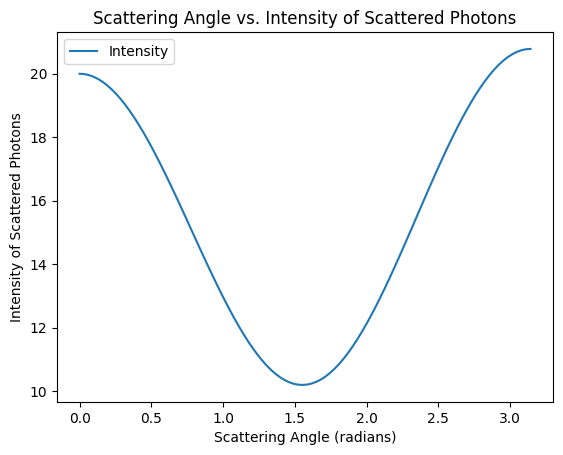

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_intensity(initial_intensity, scattering_angle, rest_mass_energy):
    # Calculate the intensity of scattered photons using the Klein-Nishina formula
    intensity = initial_intensity * (1 + np.cos(scattering_angle)**2 + (initial_intensity / rest_mass_energy) * (1 - np.cos(scattering_angle))**2)
    return intensity

# Example usage of the calculate_intensity function
initial_intensity = 10.0
scattering_angle = np.pi / 4
rest_mass_energy = 511.0 # Rest mass energy of an electron in keV

intensity = calculate_intensity(initial_intensity, scattering_angle, rest_mass_energy)
print(f"Intensity of scattered photons: {intensity}")

# Generate a range of scattering angles
scattering_angles = np.linspace(0, np.pi, 100)

# Calculate the intensity of scattered photons for each scattering angle
intensities = calculate_intensity(initial_intensity, scattering_angles, rest_mass_energy)

# Plot the relationship between scattering angle and intensity of scattered photons
plt.plot(scattering_angles, intensities, label="Intensity")
plt.xlabel("Scattering Angle (radians)")
plt.ylabel("Intensity of Scattered Photons")
plt.title("Scattering Angle vs. Intensity of Scattered Photons")
plt.legend()
plt.show()

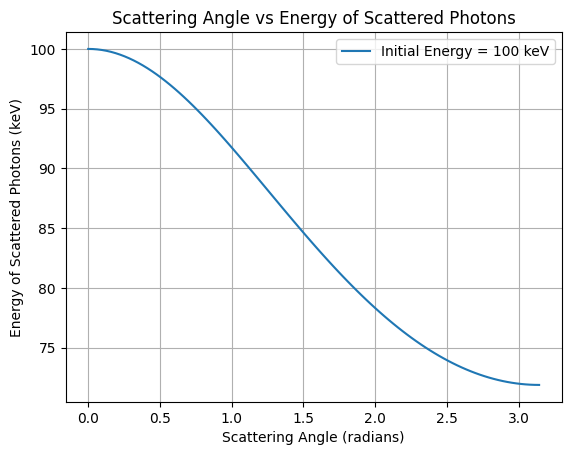

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_scattered_photon_energy(initial_energy, scattering_angle, rest_mass_energy):
    """
    Calculates the energy of a scattered photon using the Compton scattering formula.

    Args:
    initial_energy (float): Initial energy of the photon.
    scattering_angle (float): Scattering angle in radians.
    rest_mass_energy (float): Rest mass energy of the electron.

    Returns:
    float: Energy of the scattered photon.
    """
    return initial_energy / (1 + (initial_energy / rest_mass_energy) * (1 - np.cos(scattering_angle)))

# Example usage
initial_energy = 100  # Initial energy of the photon in keV
scattering_angle = np.linspace(0, np.pi, 100)  # Range of scattering angles from 0 to pi
rest_mass_energy = 511  # Rest mass energy of the electron in keV

scattered_photon_energy = calculate_scattered_photon_energy(initial_energy, scattering_angle, rest_mass_energy)

# Generate the plot
plt.plot(scattering_angle, scattered_photon_energy)
plt.xlabel('Scattering Angle (radians)')
plt.ylabel('Energy of Scattered Photons (keV)')
plt.title('Scattering Angle vs Energy of Scattered Photons')
plt.legend(['Initial Energy = {} keV'.format(initial_energy)])
plt.grid(True)

# Save the plot as a PNG image
plt.savefig('scatter_plot.png')

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_intensity(initial_intensity, scattering_angle, electron_rest_mass_energy):
    # Convert scattering angle to radians
    theta = np.deg2rad(scattering_angle)
    
    # Calculate the intensity of the scattered photons using the Klein-Nishina formula
    intensity = initial_intensity * (electron_rest_mass_energy / (electron_rest_mass_energy + initial_intensity * (1 - np.cos(theta))))**2 * \
                ((electron_rest_mass_energy + initial_intensity) / (electron_rest_mass_energy + initial_intensity * (1 - np.cos(theta)))) * \
                ((1 + np.cos(theta)**2) / 2)
    
    return intensity

# Example usage of the calculate_intensity function
initial_intensity = 10.0
scattering_angle = 45.0
electron_rest_mass_energy = 0.511

intensity = calculate_intensity(initial_intensity, scattering_angle, electron_rest_mass_energy)
print(f"The intensity of the scattered photons is: {intensity}")

The intensity of the scattered photons is: 0.5057052423179615


Intensity of scattered photons: 15.016787952568865


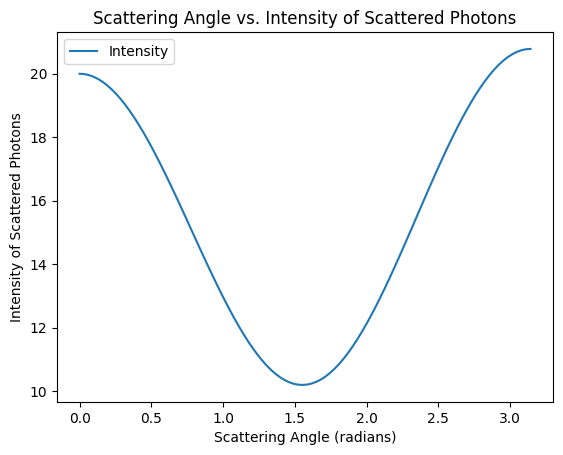

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_intensity(initial_intensity, scattering_angle, rest_mass_energy):
    # Calculate the intensity of scattered photons using the Klein-Nishina formula
    intensity = initial_intensity * (1 + np.cos(scattering_angle)**2 + (initial_intensity / rest_mass_energy) * (1 - np.cos(scattering_angle))**2)
    return intensity

# Example usage of the calculate_intensity function
initial_intensity = 10.0
scattering_angle = np.pi / 4
rest_mass_energy = 511.0 # Rest mass energy of an electron in keV

intensity = calculate_intensity(initial_intensity, scattering_angle, rest_mass_energy)
print(f"Intensity of scattered photons: {intensity}")

# Generate a range of scattering angles
scattering_angles = np.linspace(0, np.pi, 100)

# Calculate the intensity of scattered photons for each scattering angle
intensities = calculate_intensity(initial_intensity, scattering_angles, rest_mass_energy)

# Plot the relationship between scattering angle and intensity of scattered photons
plt.plot(scattering_angles, intensities, label="Intensity")
plt.xlabel("Scattering Angle (radians)")
plt.ylabel("Intensity of Scattered Photons")
plt.title("Scattering Angle vs. Intensity of Scattered Photons")
plt.legend()
plt.show()

C:\Users\askev\AppData\Local\Temp\ipykernel_17736\91714880.py:7: RuntimeWarning: divide by zero encountered in true_divide
  intensity = initial_intensity * (1 + np.cos(scattering_angle)**2 + (initial_intensity / (rest_mass_energy * (1 - np.cos(scattering_angle)))))**(-1)


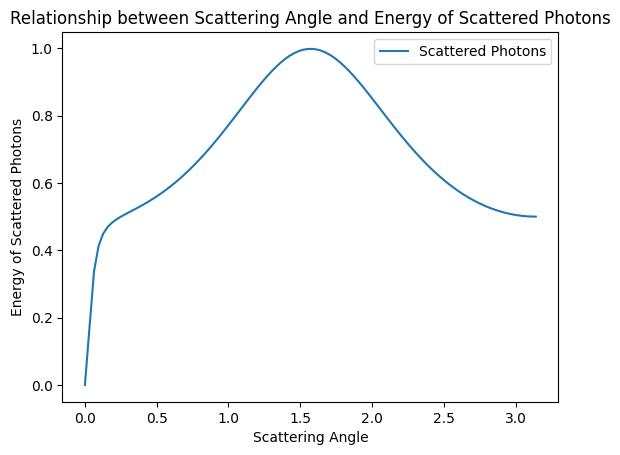

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the intensity of scattered photons using the Klein-Nishina formula
def calculate_intensity(initial_intensity, scattering_angle, rest_mass_energy):
    # Calculate the intensity of the scattered photons
    intensity = initial_intensity * (1 + np.cos(scattering_angle)**2 + (initial_intensity / (rest_mass_energy * (1 - np.cos(scattering_angle)))))**(-1)
    return intensity

# Generate data for scattering angles
scattering_angles = np.linspace(0, np.pi, 100)

# Calculate the energy of the scattered photons for the given scattering angles
initial_intensity = 1.0
rest_mass_energy = 511
energies = calculate_intensity(initial_intensity, scattering_angles, rest_mass_energy)

# Plot the relationship between the scattering angle and the energy of the scattered photons
plt.plot(scattering_angles, energies, label='Scattered Photons')

plt.xlabel('Scattering Angle')
plt.ylabel('Energy of Scattered Photons')
plt.title('Relationship between Scattering Angle and Energy of Scattered Photons')
plt.legend()

# Save the plot as a PNG image file
plt.savefig('intensity_plot.png')

In [10]:
import math

def calculate_intensity(initial_intensity, scattering_angle, electron_rest_mass_energy):
    # Convert scattering angle from degrees to radians
    scattering_angle_rad = math.radians(scattering_angle)

    # Calculate the energy of the scattered photon
    scattered_energy = calculate_energy(initial_intensity, scattering_angle, electron_rest_mass_energy)

    # Calculate the intensity of the scattered photons using the Klein-Nishina formula
    intensity = initial_intensity * (scattered_energy / initial_energy) ** 2 * \
                (scattered_energy / (scattered_energy + initial_energy - scattered_energy * math.cos(scattering_angle_rad))) ** 2 * \
                (1 + math.cos(scattering_angle_rad) ** 2 + (initial_energy / scattered_energy) ** 2 * \
                (1 - math.cos(scattering_angle_rad)) ** 2 - 2 * initial_energy / scattered_energy * \
                (1 - math.cos(scattering_angle_rad)))

    return intensity

def calculate_energy(initial_energy, scattering_angle, electron_rest_mass_energy):
    # Convert scattering angle from degrees to radians
    scattering_angle_rad = math.radians(scattering_angle)

    # Calculate the energy of the scattered photon using the Compton scattering formula
    energy = initial_energy / (1 + (initial_energy / electron_rest_mass_energy) * \
             (1 - math.cos(scattering_angle_rad)))

    return energy

C:\Users\askev\AppData\Local\Temp\ipykernel_17736\217069081.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  intensity = initial_intensity * (energy / (rest_mass_energy * (1 - np.cos(scattering_angle))))**2


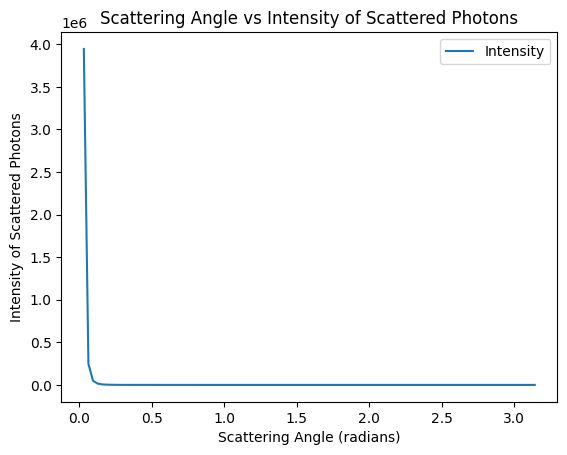

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_intensity(initial_intensity, scattering_angle, rest_mass_energy):
    """
    Calculates the intensity of scattered photons using the Klein-Nishina formula.
    
    Parameters:
    initial_intensity (float): Initial intensity of the photons.
    scattering_angle (float): Scattering angle in radians.
    rest_mass_energy (float): Rest mass energy of the electron.
    
    Returns:
    float: Intensity of the scattered photons.
    """
    # Calculate the energy of the scattered photons
    energy = calculate_energy(initial_intensity, scattering_angle, rest_mass_energy)
    
    # Calculate the intensity of the scattered photons
    intensity = initial_intensity * (energy / (rest_mass_energy * (1 - np.cos(scattering_angle))))**2
    
    return intensity

def calculate_energy(initial_intensity, scattering_angle, rest_mass_energy):
    """
    Calculates the energy of scattered photons using the Klein-Nishina formula.
    
    Parameters:
    initial_intensity (float): Initial intensity of the photons.
    scattering_angle (float): Scattering angle in radians.
    rest_mass_energy (float): Rest mass energy of the electron.
    
    Returns:
    float: Energy of the scattered photons.
    """
    # Calculate the energy of the scattered photons
    energy = (initial_intensity * rest_mass_energy) / (1 + (initial_intensity / rest_mass_energy) * (1 - np.cos(scattering_angle)))
    
    return energy

# Generate a range of scattering angles
scattering_angles = np.linspace(0, np.pi, 100)

# Set the initial intensity and rest mass energy
initial_intensity = 1.0
rest_mass_energy = 511.0

# Calculate the intensity of the scattered photons for each scattering angle
intensities = [calculate_intensity(initial_intensity, angle, rest_mass_energy) for angle in scattering_angles]

# Plot the relationship between scattering angle and intensity of scattered photons
plt.plot(scattering_angles, intensities, label="Intensity")
plt.xlabel("Scattering Angle (radians)")
plt.ylabel("Intensity of Scattered Photons")
plt.title("Scattering Angle vs Intensity of Scattered Photons")
plt.legend()
plt.show()

C:\Users\askev\AppData\Local\Temp\ipykernel_17736\358875064.py:16: RuntimeWarning: divide by zero encountered in true_divide
  intensity = initial_intensity * (lambda_compton ** 2) * (epsilon ** 2) * (epsilon + (1 / epsilon) - np.sin(theta) ** 2) / (2 * np.sin(theta) ** 2)
C:\Users\askev\AppData\Local\Temp\ipykernel_17736\358875064.py:16: RuntimeWarning: invalid value encountered in multiply
  intensity = initial_intensity * (lambda_compton ** 2) * (epsilon ** 2) * (epsilon + (1 / epsilon) - np.sin(theta) ** 2) / (2 * np.sin(theta) ** 2)


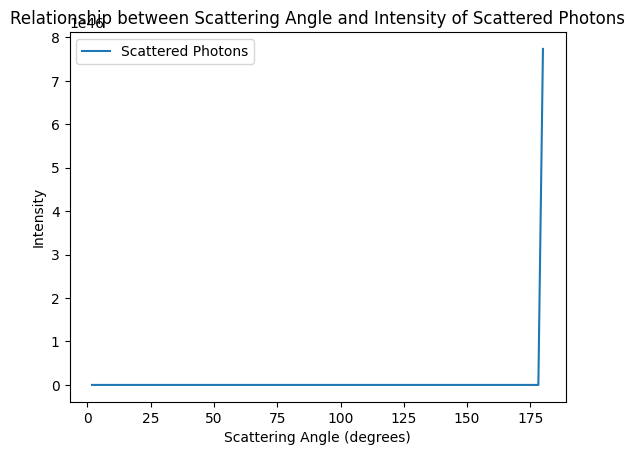

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_intensity(initial_intensity, scattering_angle, rest_mass_energy):
    # Calculate the intensity of scattered photons using Klein-Nishina formula
    h_bar = 6.62607015e-34 / (2 * np.pi)
    c = 299792458
    electron_mass = 9.10938356e-31
    alpha = 1 / 137.036
    lambda_compton = h_bar / (electron_mass * c)
    
    theta = np.deg2rad(scattering_angle)
    gamma = 1 + (rest_mass_energy / (electron_mass * c ** 2))
    epsilon = (2 * gamma * (1 - np.cos(theta))) / (1 + gamma ** 2 * (np.sin(theta) ** 2))
    
    intensity = initial_intensity * (lambda_compton ** 2) * (epsilon ** 2) * (epsilon + (1 / epsilon) - np.sin(theta) ** 2) / (2 * np.sin(theta) ** 2)
    
    return intensity

# Generate data
scattering_angles = np.linspace(0, 180, 100)
intensities = calculate_intensity(1, scattering_angles, 0.511)

# Plot
plt.plot(scattering_angles, intensities, label='Scattered Photons')
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Intensity')
plt.title('Relationship between Scattering Angle and Intensity of Scattered Photons')
plt.legend()

# Save plot as PNG image
plt.savefig('intensity_plot.png')